In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [68]:
#Heart Disease

#age
#sex
#chest pain type (4 values)
#resting blood pressure
#serum cholestoral in mg/dl
#fasting blood sugar > 120 mg/dl
#resting electrocardiographic results (values 0,1,2)
#maximum heart rate achieved
#exercise induced angina
#oldpeak = ST depression induced by exercise relative to rest
#the slope of the peak exercise ST segment
#number of major vessels (0-3) colored by flourosopy
#thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [6]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.duplicated().sum()

723

In [9]:
hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [10]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

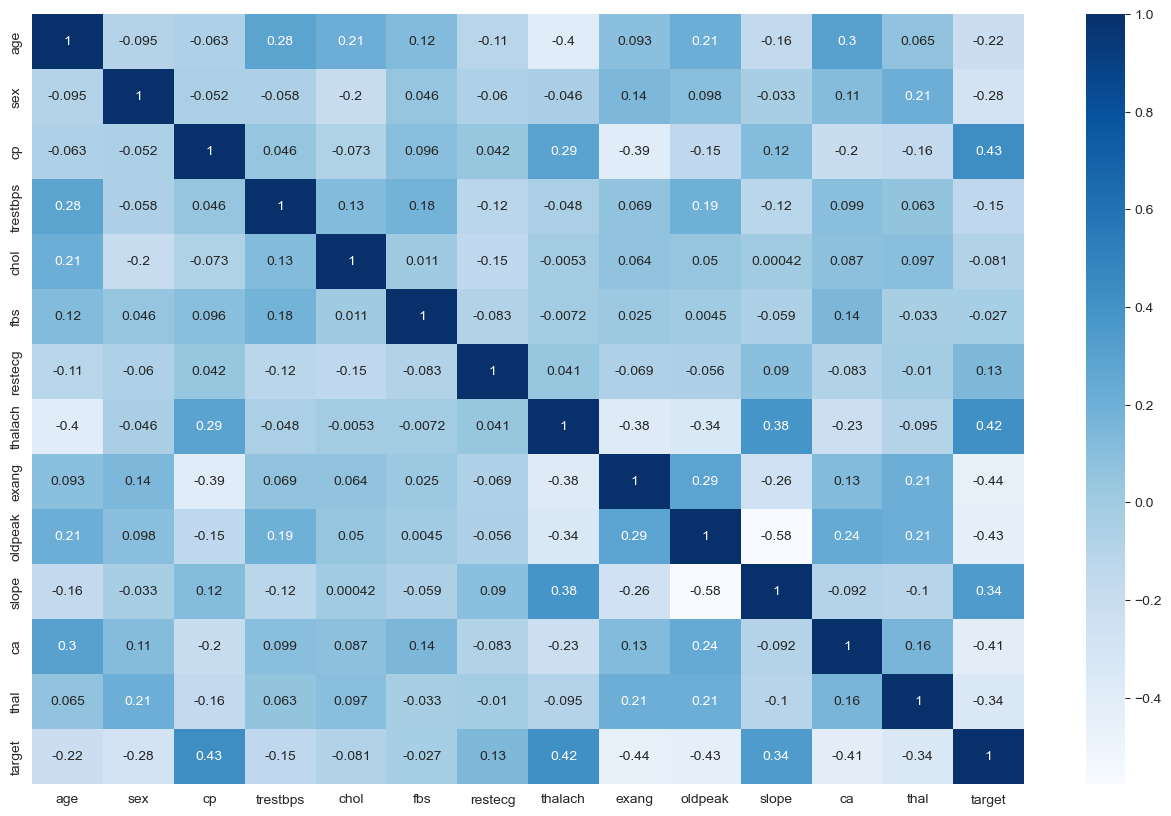

In [11]:
plt.figure(figsize = (16, 10))
sns.heatmap(hd.corr(), annot = True, cmap = 'Blues')

In [12]:
hd.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [13]:
for c in hd.columns:
    print(f"{c}: {hd[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [180]:
categoricas =['sex','cp','fbs','restecg','exang','slope' ,'ca' ,'thal']
numericas =['age' ,'trestbps', 'chol' ,'thalach','oldpeak','target']

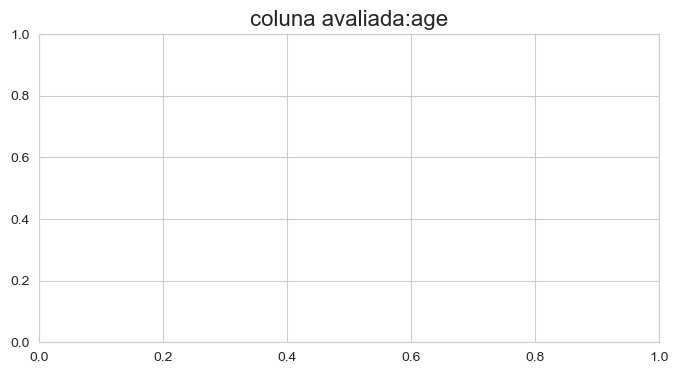

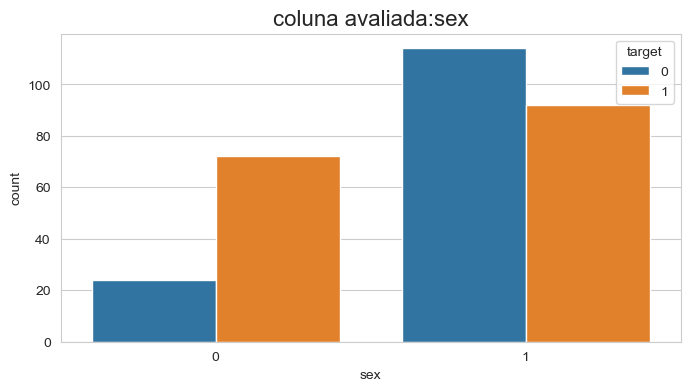

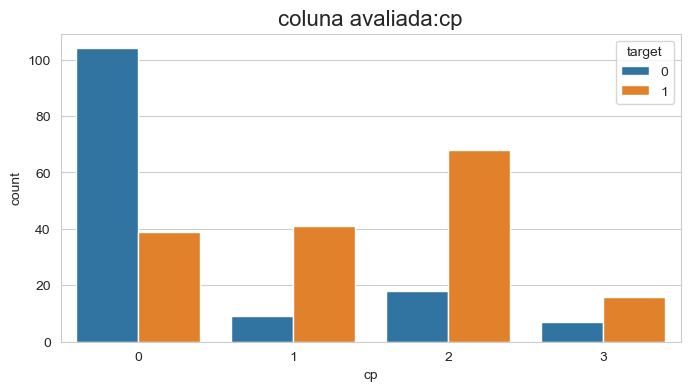

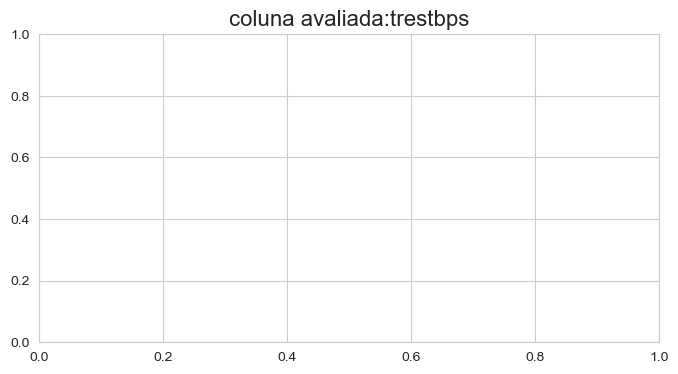

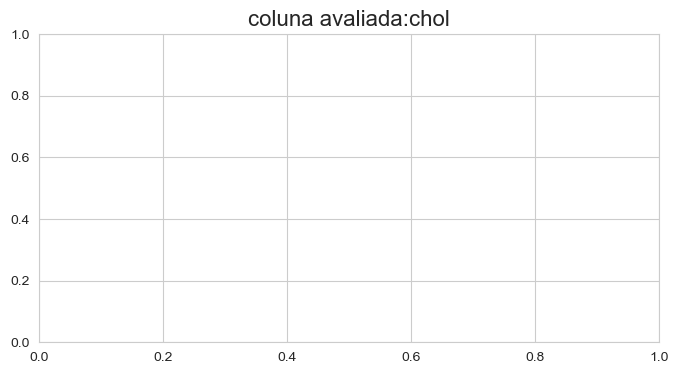

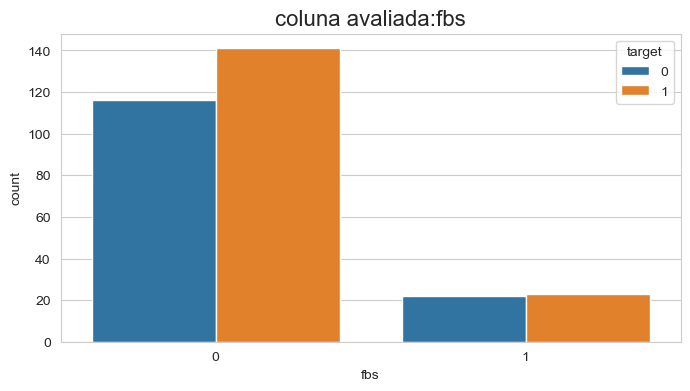

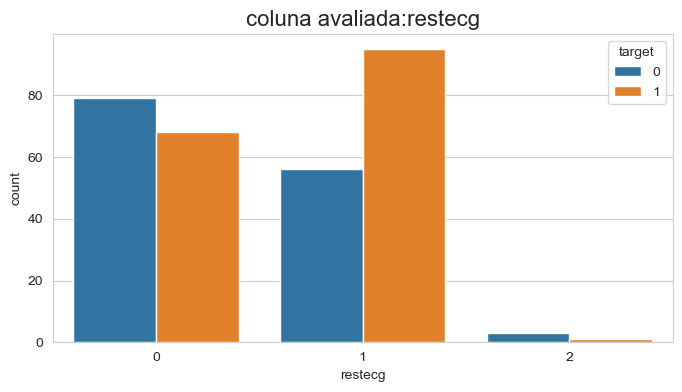

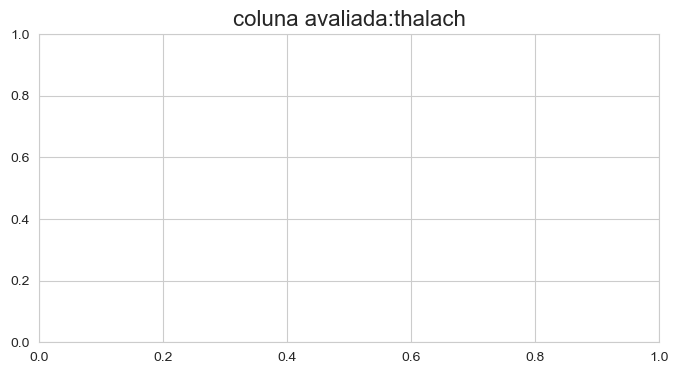

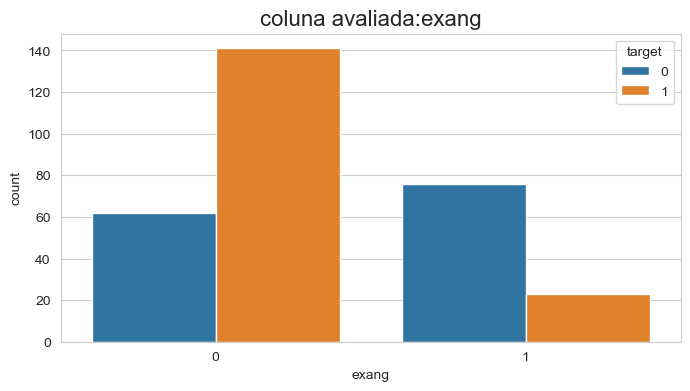

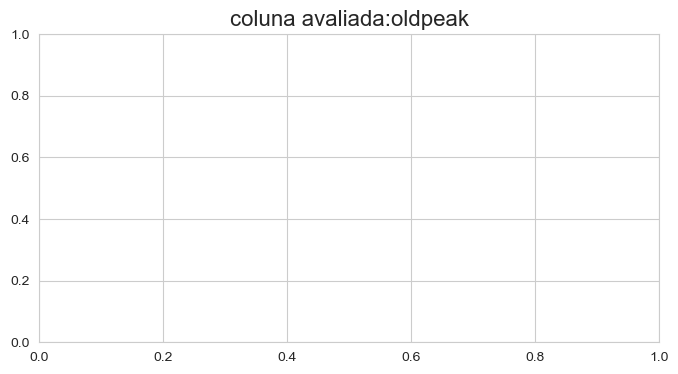

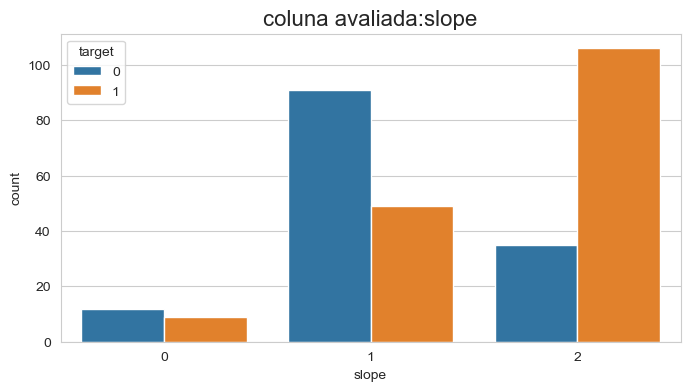

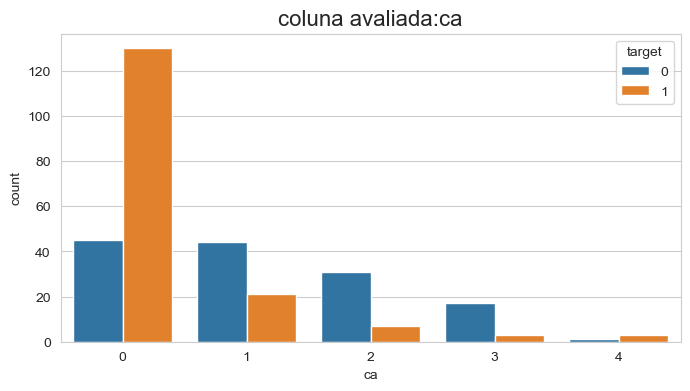

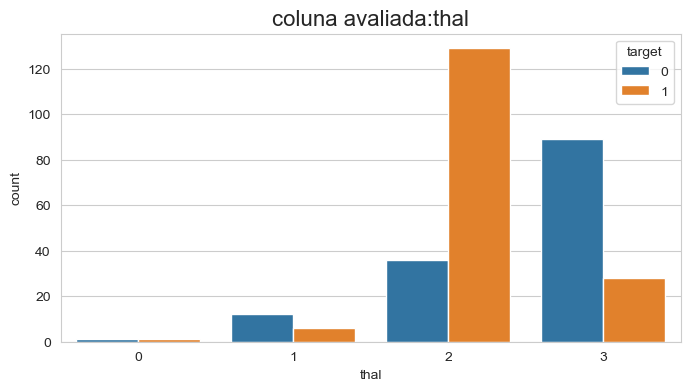

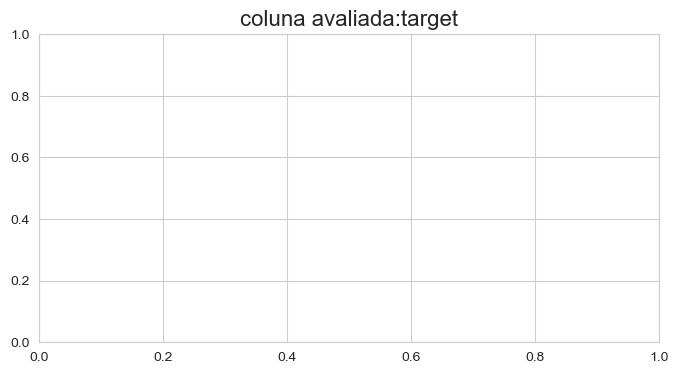

In [185]:
for c in hd.columns:
    plt.figure(figsize = (8,4))
    plt.title(f"coluna avaliada:{c}",fontsize = 16)
    if c in categoricas:
        sns.countplot (x = hd[c], hue = hd['target'])
        if c in numericas:
            sns.histplot(hd[c], kde = True)



In [78]:
#Removing Outliers


In [17]:
hd['trestbps'].quantile(0.99)

180.0

<Axes: >

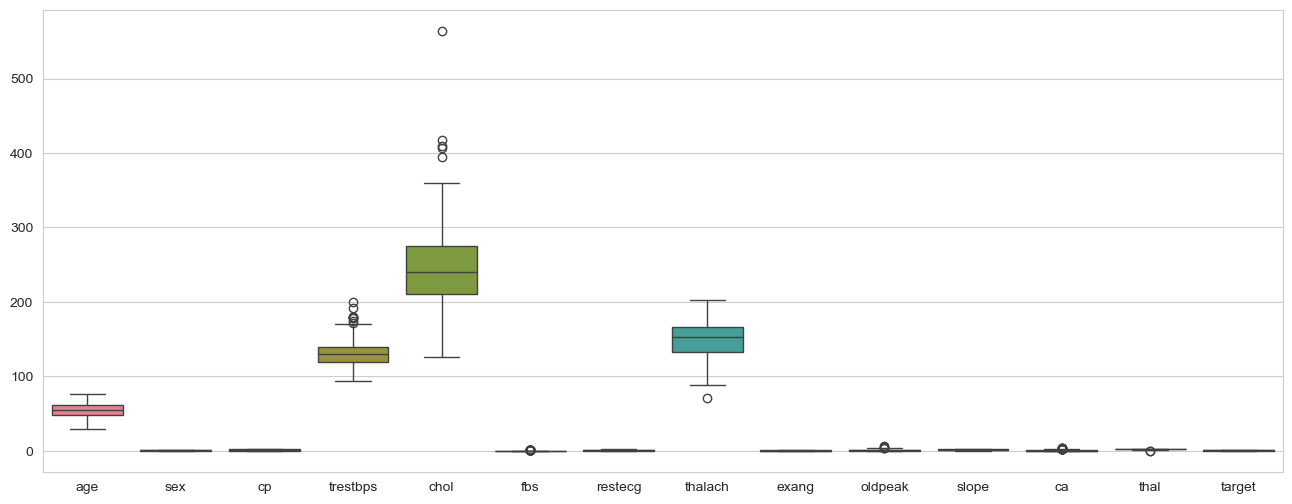

In [16]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = hd)

In [187]:
hd1 = hd[hd["trestbps"] < hd['trestbps'].quantile(0.99)]
hd1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: >

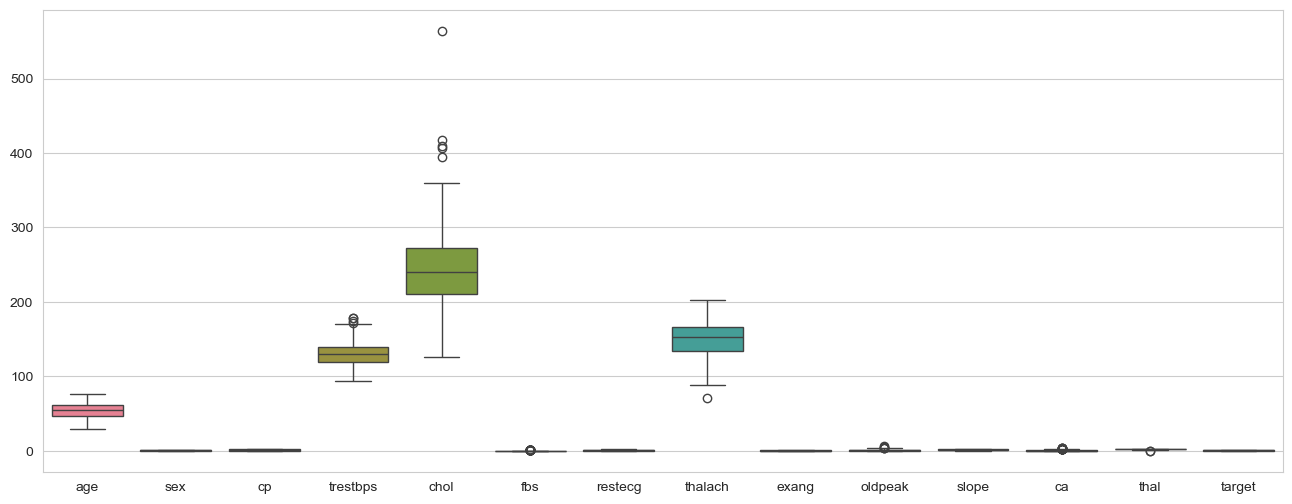

In [19]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = hd1)

In [24]:
hd1['chol'].quantile(0.98)


354.4799999999999

In [29]:
hd2 = hd1[hd1["chol"] < hd['chol'].quantile(0.98)]

<Axes: >

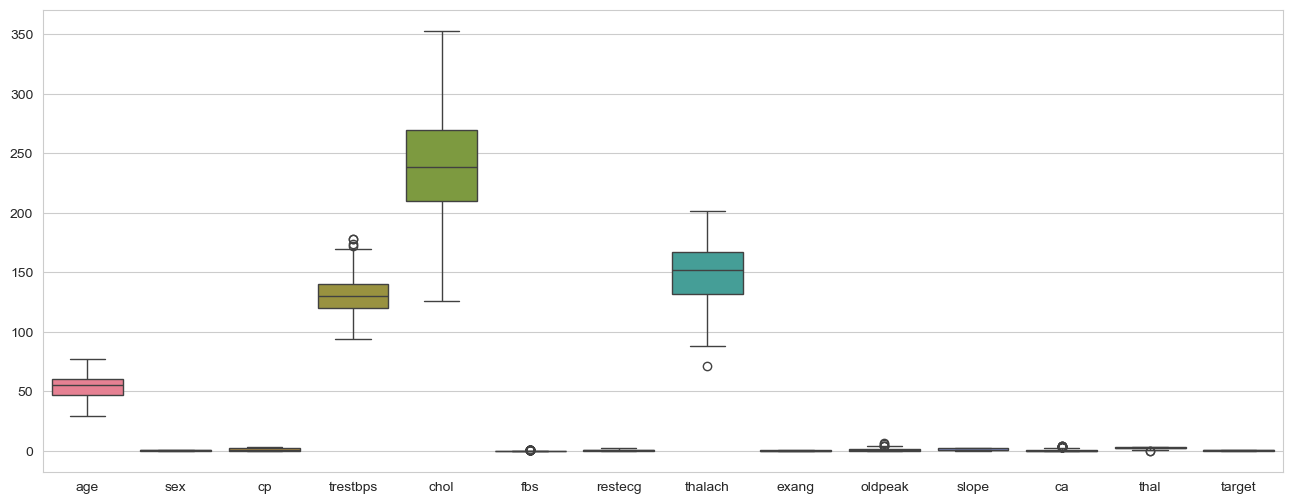

In [27]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = hd2)

In [30]:
hd2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,54.148276,0.703448,0.972414,130.527586,241.520690,0.144828,0.534483,149.410345,0.320690,1.017586,1.400000,0.717241,2.306897,0.544828
std,9.078402,0.457527,1.035326,16.158844,43.795861,0.352535,0.520032,23.087630,0.467548,1.145082,0.615824,1.006577,0.616066,0.498847
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.250000,0.000000,0.000000,132.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.750000,0.000000,1.000000,166.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,353.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
hd2['thalach'].quantile(0.005)

88.89

In [32]:
hd3 = hd2[hd2["thalach"] > hd2['thalach'].quantile(0.005)]

<Axes: >

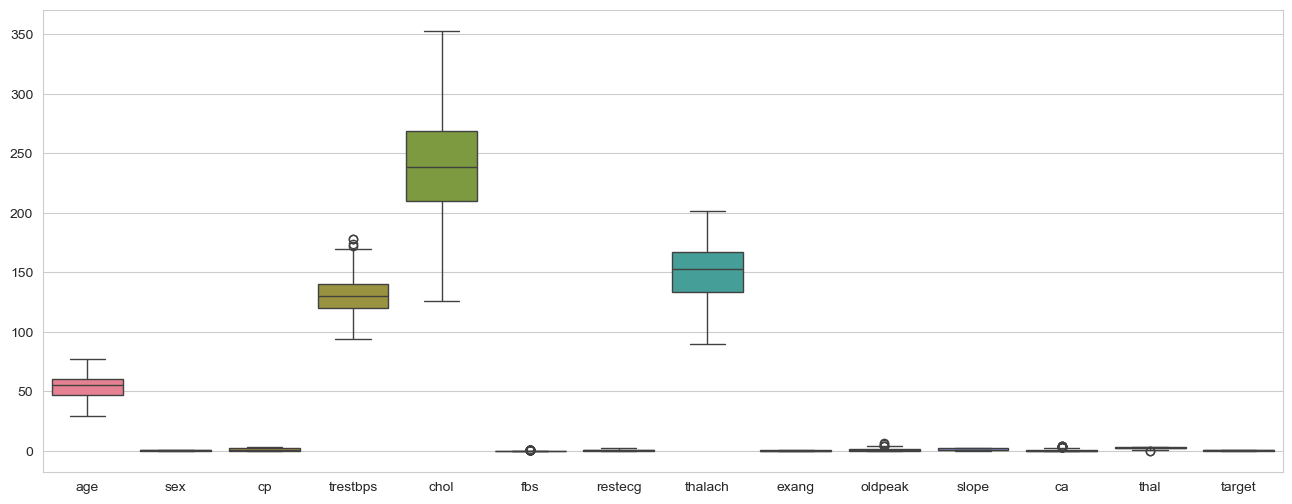

In [33]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = hd3)

In [35]:
hd3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,54.093750,0.701389,0.979167,130.489583,241.423611,0.145833,0.531250,149.895833,0.319444,1.017014,1.402778,0.718750,2.305556,0.548611
std,9.076613,0.458446,1.035729,16.153442,43.905438,0.353553,0.520382,22.404336,0.467073,1.149014,0.617057,1.009051,0.616586,0.498498
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.750000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,0.000000,1.000000,167.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,353.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [38]:
categoricas = ['sex','cp','fbs','restecg','exang','slope' ,'ca' ,'thal']
numericas = ['age','trestbps', 'chol' ,'thalach','oldpeak','target']

In [39]:
hd4 = pd.get_dummies(hd3, columns = [ 'sex','cp','fbs','restecg','exang','slope' ,'ca' ,'thal'])
hd4

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
733,44,108,141,175,0.6,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
739,52,128,255,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
843,59,160,273,125,0.0,0,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False


In [40]:
hd4['chol'].max(), hd4['chol'].min() 

(353, 126)

In [41]:
hd4.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [49]:
X = hd4.drop('target', axis = 1)
y = hd4['target']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
log = LogisticRegression(max_iter=10000)

In [152]:
log.fit(X_train, y_train)  

LogisticRegression(max_iter=10000)

In [66]:
log.score(X_train, y_train)

0.8739130434782608

In [67]:
log.score(X_test, y_test)

0.8793103448275862

In [191]:
###
y_previsto = log.predict(X_test)

In [72]:
accuracy_score(y_test, y_previsto)

0.8793103448275862

In [73]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.89      0.91      0.90        34

    accuracy                           0.88        58
   macro avg       0.88      0.87      0.87        58
weighted avg       0.88      0.88      0.88        58



In [126]:
confusion_matrix(y_test, y_previsto)

array([[20,  4],
       [ 3, 31]], dtype=int64)

--- CLASSIFCATION REPORT ---
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.89      0.91      0.90        34

    accuracy                           0.88        58
   macro avg       0.88      0.87      0.87        58
weighted avg       0.88      0.88      0.88        58

--- CONFUSION MATRIX ---


<Axes: >

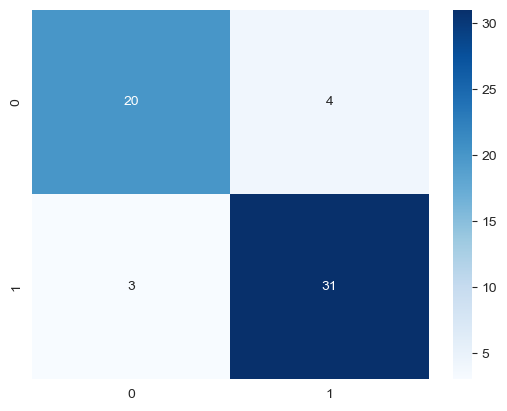

In [161]:
def relatorio_ml (df, algoritmo, opt = 2):
    X = df.drop('target', axis = 1 )
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if opt == 0:
        ml = algoritmo(max_iter = 10000)
    elif opt == 1:
        ml =  algoritmo(n_estimators = 10000)
    elif opt == 2:
        ml = algoritmo()

    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print (f"Acuracia treino: {score_train * 10000:.2f}%")
    score_test = ml.score(X_test, y_test)
    print (f"Acuracia test: {score_test * 10000:.2f}%")

y_previsto = log.predict(X_test)
print("--- CLASSIFCATION REPORT ---")
print(classification_report(y_test, y_previsto))
print("--- CONFUSION MATRIX ---")
confusao = confusion_matrix(y_test, y_previsto)
sns.heatmap (confusao, annot = True, cmap = 'Blues')


--- CLASSIFCATION REPORT ---
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.89      0.91      0.90        34

    accuracy                           0.88        58
   macro avg       0.88      0.87      0.87        58
weighted avg       0.88      0.88      0.88        58

--- CONFUSION MATRIX ---


<Axes: >

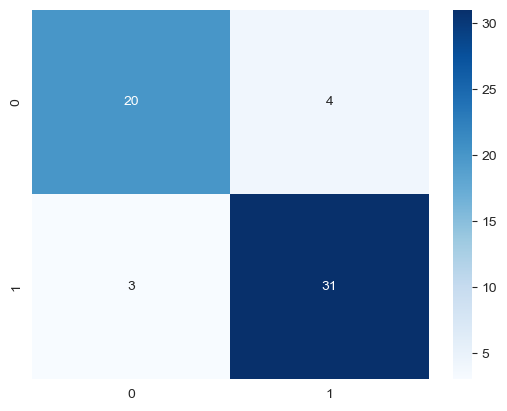

In [195]:
def relatorio_ml_scaler (df, algoritmo, opt = 2):
    X = df.drop('target', axis = 1 )
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    cols_scaler = ['age','trestbps', 'chol' ,'thalach','oldpeak','target']
    X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
    X_test[cols_scaler] = scaler.transform(X_test[cols_scaler])

    if opt == 0:
        ml = algoritmo(max_iter = 10000)
    elif opt == 1:
        ml =  algoritmo(n_estimators = 10000)
    elif opt == 2:
        ml = algoritmo()

    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print (f"Acuracia treino: {score_train * 10000:.2f}%")
    score_test = ml.score(X_test, y_test)
    print (f"Acuracia test: {score_test * 10000:.2f}%")

y_previsto = log.predict(X_test)
print("--- CLASSIFCATION REPORT ---")
print(classification_report(y_test, y_previsto))
print("--- CONFUSION MATRIX ---")
confusao = confusion_matrix(y_test, y_previsto)
sns.heatmap (confusao, annot = True, cmap = 'Blues')

In [171]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data_scaler = { 'Models' : ['Logistic Regression','Decision Tree', 'Kneighbors', 'Random Forest Classifier', 'Ada Boost'],
        'Acuracia Treino' : [round(log_train_scaler * 100, 2), round(tree_train_scaler * 100, 2), round(kn_train_scaler * 100, 2),
                            round(rand_train_scaler * 100, 2), round(ada_train_scaler * 100, 2)],
        'Acuracia Teste': [round(log_test_scaler * 100, 2), round(tree_test_scaler * 100, 2), round(kn_test_scaler * 100, 2),
                          round(rand_test_scaler * 100, 2), round(ada_test_scaler * 100, 2)],
              }

df_scalar = pd.DataFrame(data_scaler)
df_scalar.sort_values(by='Acuracia Teste' ,ascending=False, inplace = True)
df_scalar   